In [1]:
import glob
import os

import matplotlib.image as mpimg
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import helper
%matplotlib inline

Using TensorFlow backend.


In [2]:
helper.post_init()

In [3]:
data_frame = pd.read_csv(os.path.join(helper.DATA_DIR, 'driving_log.csv'))

In [4]:
data_frame.describe(include='all')

,center,left,right,steering,throttle,brake,speed
count,8036,8036,8036,8036.000000,8036.000000,8036.000000,8036.000000
unique,8036,8036,8036,NaN,NaN,NaN,NaN
top,IMG/center_2016_12_01_13_45_31_240.jpg,IMG/left_2016_12_01_13_43_01_351.jpg,IMG/right_2016_12_01_13_44_48_911.jpg,NaN,NaN,NaN,NaN
freq,1,1,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.004070,0.869660,0.001970,28.169839
std,NaN,NaN,NaN,0.128840,0.301326,0.036565,6.149327
min,NaN,NaN,NaN,-0.942695,0.000000,0.000000,0.502490
25%,NaN,NaN,NaN,0.000000,0.985533,0.000000,30.183093
50%,NaN,NaN,NaN,0.000000,0.985533,0.000000,30.186400
75%,NaN,NaN,NaN,0.000000,0.985533,0.000000,30.186640


In [6]:
X, y = helper.load_driving_log()
X_adj, y_adj = helper.load_input_data(0.1, angle_groups=HIST_DEFAULT_NUM_BINS, init_size=1000)

Load data
Augment data


1000it [00:29, 34.35it/s]

Adjust data



0it [00:00, ?it/s]


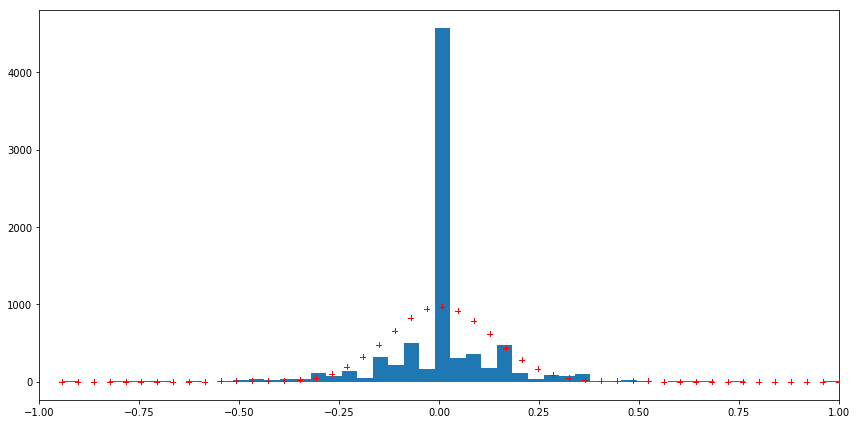

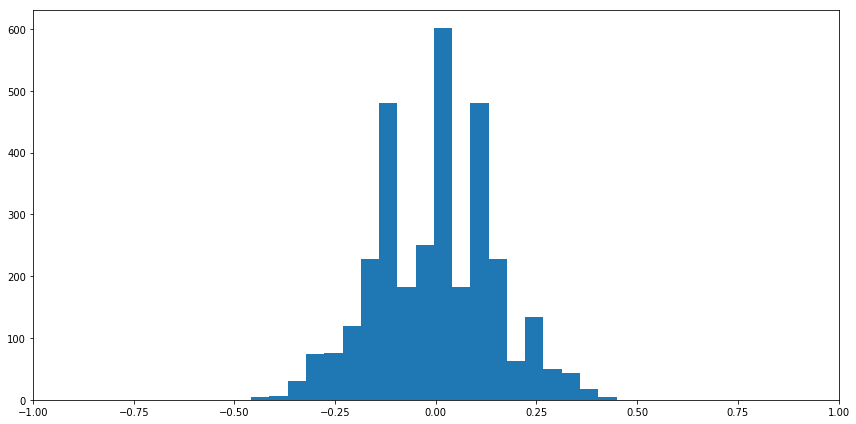

In [19]:
helper.plot_optimal_distribution(y, bins_num=50)
helper.plot_distribution(y_adj, bins_num=20)

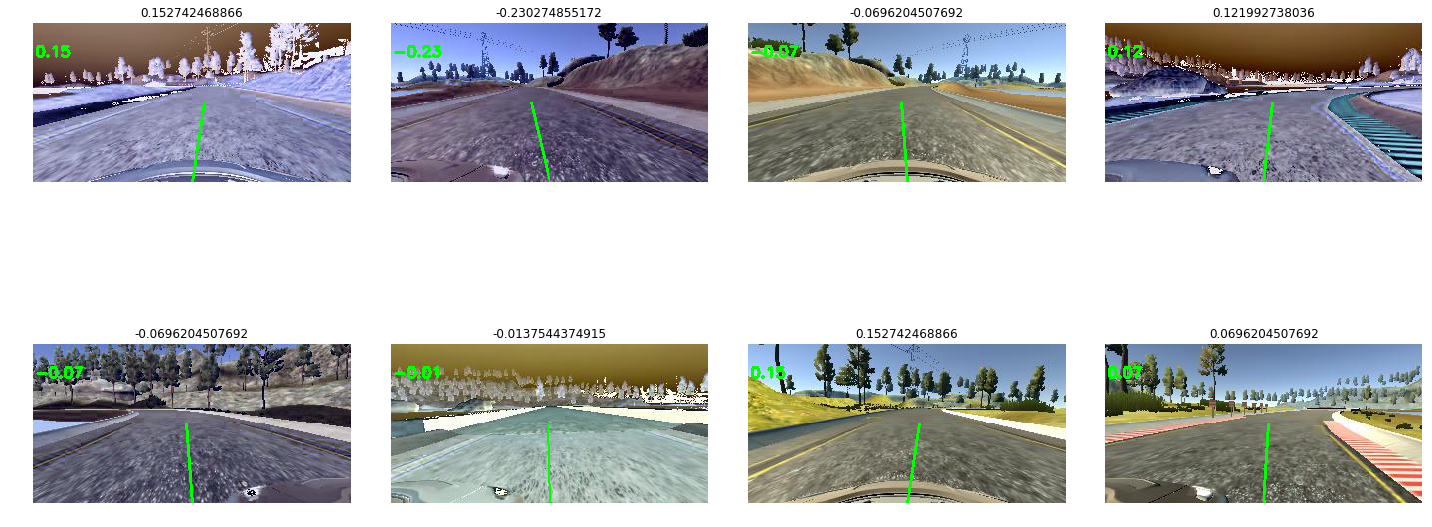

(8, 160, 320, 3)
(8,)


In [8]:
helper.plot_random_images(X_adj, y_adj)

(160, 320, 3)
(160, 320, 3)


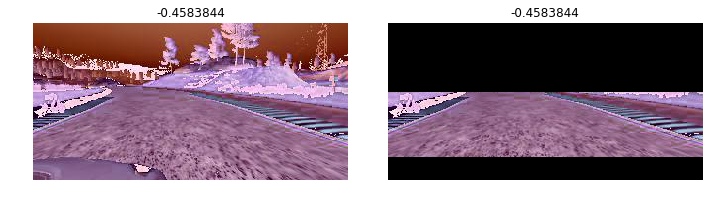

In [24]:
top_crop_px = 71
bottom_crop_px = 23

test_image = helper.load_image(X_adj[0])
test_class = y_adj[0]

# img[y: y + h, x: x + w]
y_bottom_crop_px = test_image.shape[0] - bottom_crop_px
cropped_image = test_image.copy()
cropped_image[:top_crop_px, :, :] = 0
cropped_image[y_bottom_crop_px:, :, :] = 0

result_images = np.array([test_image, cropped_image])
result_classes = np.array([test_class, test_class])

print(test_image.shape)
print(cropped_image.shape)

helper.plot_images(result_images, result_classes, cols=2)

In [25]:
histories = [(path, path.split("/")[2]) for path in
             glob.iglob('../work9/**/model_history_history.p',
                        recursive=True)]

In [26]:
top_k_loss_items, top_k_val_loss, top_k_mse = helper.get_top_smallest_k_history_metrics(histories, top_k_smallest=10)

print("\nTop smallest loss:")
for item in top_k_loss_items:
    print("{} (name): {} (ep.) - {} (val.)".format(item[0], int(item[1][0]), item[1][1]))

print("\nTop smallest val_loss:")
for item in top_k_val_loss:
    print("{} (name): {} (ep.) - {} (val.)".format(item[0], int(item[1][0]), item[1][1]))

print("\nTop smallest mse:")
for item in top_k_mse:
    print("{} (name): {} (ep.) - {} (val.)".format(item[0], int(item[1][0]), item[1][1]))


Top smallest loss:
relu_cor_010 (name): 9 (ep.) - 0.007142134903768867 (val.)
relu_cor_020 (name): 9 (ep.) - 0.012731650295746471 (val.)
elu_cor_010 (name): 19 (ep.) - 0.018273918823030064 (val.)

Top smallest val_loss:
relu_cor_010 (name): 6 (ep.) - 0.010485790903142665 (val.)
relu_cor_020 (name): 6 (ep.) - 0.01724156725210218 (val.)
elu_cor_010 (name): 16 (ep.) - 0.022621652816529704 (val.)

Top smallest mse:
relu_cor_010 (name): 9 (ep.) - 0.007142134903768867 (val.)
relu_cor_020 (name): 9 (ep.) - 0.012731650295746471 (val.)
elu_cor_010 (name): 19 (ep.) - 0.018273918823030064 (val.)


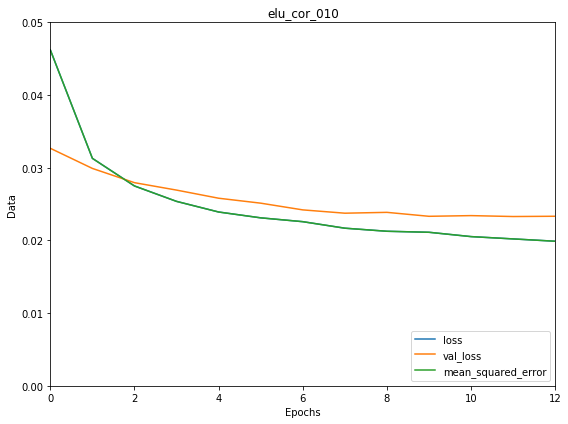

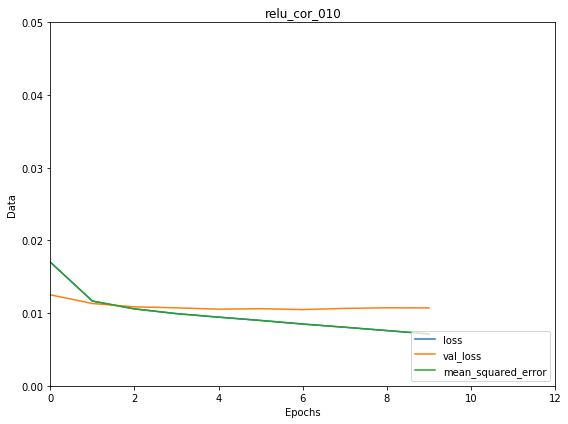

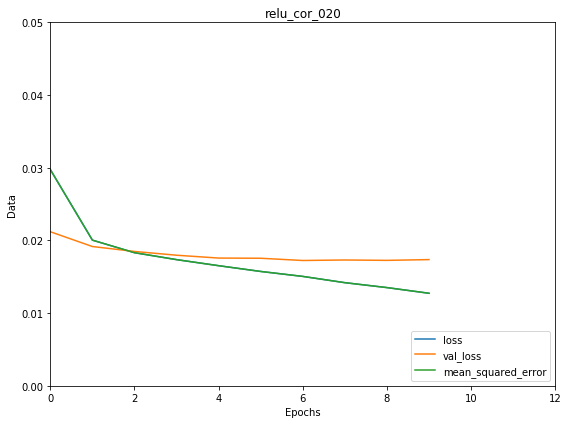

In [27]:
res = helper.plot_model_history_list(histories, ylim=(0, 0.05), xlim=(0, 12))